# Big Data Exercises

In these exercises we will work on data from a series of global weather monitoring stations used to measure climate trends to examine long-term trends in temperature for your home locality. This data comes from the Global Historical Climatology Network, and is the actual raw data provided by NOAA. The only changes I have made to this data are a few small formatting changes to help meet the learning goals of this exercise. 

To do these excercises, first please download the data for this exercise [from here](https://www.dropbox.com/s/oq36w90hm9ltgvc/global_climate_data.zip?dl=0). Note this is a big file (this is a big-data exercise, after all), so be patient. 

**(1)** The data we'll be working with can be found in the file `ghcnd_daily.tar.gz`. It includes daily weather data from thousands of weather stations around the work over many decades. 

Begin by decompressing the file and checking it's size -- it should come out to be *about* 4gb, but will expand to about 12 gb in RAM, which means there's just no way most students (who usually have, at most, 16gb of RAM) can import this dataset into pandas and manipulate it directly. 

(Unsure how to decompress it? Try checking the readme)

(Note: what we're doing can be applied to much bigger datasets, but they sometimes takes hours to work with, so we're working with data that's just a *little* big so we can get exercises done in reasonable time).  

In [1]:
import pandas as pd

**(2)** Thankfully, we aren't going to be working with *all* the data today. Instead, everyone should pick three weather stations to examine during this analysis. 

To pick your stations, we'll need to open the `ghcnd-stations.txt` file in the directory you've downloaded. It includes both station codes (which is what we'll find in the `ghcnd_daily.csv` data, as well as the name and location of each station). 

When picking a weather station, make sure to pick one flagged as being in either GSN, HCN, or CRN (these designate more formalized stations that have been around a long time, ensuring you'll get a station with data that has been recorded over a longer period). 

Note that Station IDs start with the two-letter code of the country in which they are located, and the "NAME" column often constains city names. 

**The `ghcnd-stations.txt` is a "fixed-width" dataset,** meaning that instead of putting commas or tabs between observations, all columns have the same width (in terms of number of characters). So to import this data you'll have to (a) read the notes about the data in the project README.txt, and (b) read about how to read in fixed-width data in pandas. When entering column specifications, remember that normal people count from 1 and include end points, while Python counts from 0 and doesn't include end points (so if the readme says data is in columns 10-20, in Python that'd be 9 through 20).

In [2]:
# selected station ids
selected = set(["USC00050848", "USC00161807", "USC00092006"])

**(3)** Now that we something about the observations we want to work with, we can now turn to our actual weather data. 

Our daily weather can be found in `ghcnd_daily.csv`, which you get by unzipping `ghcnd_daily.tar.gz`. Note that the README.txt talks about this being a fixed-width file. Since you've already dealt with one fixed-width file, I've just converted this to a CSV, and dropped all the data that isn't "daily max temperatures". 

Let's start with the fun part. **SAVE YOUR NOTEBOOK AND ANY OTHER OPEN FILES!**. Then just try and import the data (`ghcnd_daily.csv`) while watching your Activity Monitor (Mac) or Resource Monitor (Windows) to see what happens.  

If you have 8GB of RAM, this should fail miserably. 

If you have 16GB of RAM, you might just get away with this. But if it *does* load, try sorting the data by year and see how things go. 

(If you have 32GB of RAM: you're actually probably fine with data this size. Sorry -- datasets big enough to cause big problems for people with 32GB take a long time to chunk on an 8GB computer, and these exercises have to be fast enough to finish in a class period! There are some exercises at the bottom with a REALLY big dataset you can work with.)

You may have to kill your kernel, kill VS Code, and start over when this explodes...

In [3]:
reader = pd.read_csv(
    "/Users/rosellazheng/Desktop/HOMEWORK/global_climate_data/ghcnd_daily.csv",
    chunksize=150_000,
)

**(4)** Now that we know that we can't work with this directly, it's good with these big datasets to just import ~200 lines so you can get a feel for the data. So load *just 200 lines* of `ghcnd_daily.csv`.

In [4]:
import pandas as pd

chunks = pd.read_csv(
    "/Users/rosellazheng/Desktop/HOMEWORK/global_climate_data/ghcnd_daily.csv",
    chunksize=10000,
)

**(5)** Once you have a sense of the data, write code to chunk your data: i.e. code that reads in all blocks of the data that will fit in ram, keeps only the observations for the weather stations you've selected to focus on, and throws away everything else.

In addition to your own three weather stations, please also include station USC00050848 (a weather station from near my home!) so you can generate results that we can all compare (to check for accuracy). 

Note you will probably have to play with your chunk sizes (probably while watching your RAM usage?). That's because small chunk sizes, while useful for debugging, are very slow. 

Every time Python processes a chunk, there's a fixed processing cost, so in a dataset with, say, 10,000,000 rows, if you try to do chunks of 100 rows, that fixed processing cost has to be paid 100,000 times. Given that, the larger you can make your chunks the better, so long as your chunks don't use up all your RAM. Again, picking a chunk size then watching your RAM usage is a good way to see how close you are to the limits of your RAM.

In [5]:
for i, chunk in enumerate(reader):
    filtered = chunk[chunk["id"].isin(selected)]
    if not filtered.empty:
        filtered.to_csv("filtered.csv", mode="a", header=(i == 0), index=False)

/var/folders/vz/w47fmdn15gv7rywdldq7f0bw0000gn/T/ipykernel_40763/3065802753.py:1: DtypeWarning: Columns (6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98,102,106,110,114,118,122,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader):
/var/folders/vz/w47fmdn15gv7rywdldq7f0bw0000gn/T/ipykernel_40763/3065802753.py:1: DtypeWarning: Columns (6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98,102,106,110,114,118,122,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader):
/var/folders/vz/w47fmdn15gv7rywdldq7f0bw0000gn/T/ipykernel_40763/3065802753.py:1: DtypeWarning: Columns (6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98,102,106,110,114,118,122,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader):
/var/folders/vz/w47fmdn15gv7rywdldq7f0bw0000gn/T/ipy

**(6)** Now, for each weather station, figure out the *earliest* year with data. Keep `USC00050848` and the two of the three weather stations you picked with the best data (i.e., you should have 3 total, two you picked and `USC00050848`).

In [6]:
cols = pd.read_csv(
    "/Users/rosellazheng/Desktop/HOMEWORK/global_climate_data/ghcnd_daily.csv",
    nrows=0,
).columns

In [7]:
stations = pd.read_csv("filtered.csv")
stations.columns = cols
stations.head()

/var/folders/vz/w47fmdn15gv7rywdldq7f0bw0000gn/T/ipykernel_40763/1066868268.py:1: DtypeWarning: Columns (30,38,46,58,126) have mixed types. Specify dtype option on import or set low_memory=False.
  stations = pd.read_csv("filtered.csv")


,id,year,month,element,value1,mflag1,qflag1,sflag1,value2,mflag2,...,qflag29,sflag29,value30,mflag30,qflag30,sflag30,value31,mflag31,qflag31,sflag31
0,USC00050848,1893,11,TMAX,189,NaN,NaN,6,78,NaN,...,NaN,6,133,NaN,NaN,6,-9999,NaN,NaN,NaN
1,USC00050848,1893,12,TMAX,167,NaN,NaN,6,133,NaN,...,NaN,6,39,NaN,NaN,6,89,NaN,NaN,6
2,USC00050848,1894,1,TMAX,128,NaN,NaN,6,122,NaN,...,NaN,6,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN
3,USC00050848,1894,2,TMAX,-11,NaN,NaN,6,44,NaN,...,NaN,NaN,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN
4,USC00050848,1894,3,TMAX,106,NaN,NaN,6,144,NaN,...,NaN,6,167,NaN,NaN,6,194,NaN,NaN,6


In [27]:
earliest = stations.groupby("id", as_index=False)["year"].min()
earliest = earliest.rename(columns={"year": "earliest_year"})

selected = list(selected)


# Names DataFrame for selected ids
def choose_name(x):
    if x == "USC00050848":
        return "Boulder, CO"
    elif x == "USC00161807":
        return "Cinclare, LA"
    else:
        return "Cleveland, GA"


names = pd.DataFrame(
    {"id": selected, "station_name": [choose_name(x) for x in selected]}
)

# left-merge to add a column; no duplicated ids
earliest = earliest.merge(names, on="id", how="left")

print(earliest)

            id  earliest_year   station_name
0  USC00050848           1893    Boulder, CO
1  USC00092006           1972  Cleveland, GA
2  USC00161807           1894   Cinclare, LA


**(7)** Now calculate the average max temp for each weather station / month in the data. Note that in a few weeks, we'll have the skills to do this by reshaping our data so each row is a single day, rather than a month. But for the moment, just sum the columns, watching out for weird values. 

To sum across the value columns, we can combine: 

```python
weather_data.filter(like='value')
```

(to just get the columns whose names start with "value") with `.mean(axis='columns')` (which averages across columns (along rows) rather than the usual averaging across rows (along columns). 

In [28]:
# select only max temperature records
max_temp = stations[stations["element"] == "TMAX"]

# replace -9999 with NaN for missing values
value_cols = [f"value{i}" for i in range(1, 32)]
max_temp[value_cols] = max_temp[value_cols].replace(-9999, pd.NA)

# average daily tmax values
max_temp["mean_tmax"] = max_temp[value_cols].mean(axis="columns")

# aggregate by month and station id
avg_max = max_temp.groupby(["id", "month"], as_index=False)["mean_tmax"].mean()


avg_max

,id,month,mean_tmax
0,USC00050848,1,72.583226
1,USC00050848,2,83.596231
2,USC00050848,3,118.885927
3,USC00050848,4,166.004336
4,USC00050848,5,212.552658
5,USC00050848,6,270.925187
6,USC00050848,7,302.24904
7,USC00050848,8,293.265027
8,USC00050848,9,251.729476
9,USC00050848,10,189.641219


**(8)** Now for each weather station, generate a separate plot of the daily temperatures over time. You should end up with a plot that looks something like this:

![temp_plots_Colorado](images/temp_plots_Boulder_CO.png)

**NOTE:** If your plot has little horizontal lines at the tops and bottoms of the temperature plots connecting perfectly vertical temperature lines, it means you made a mistake in how you plotted your data!

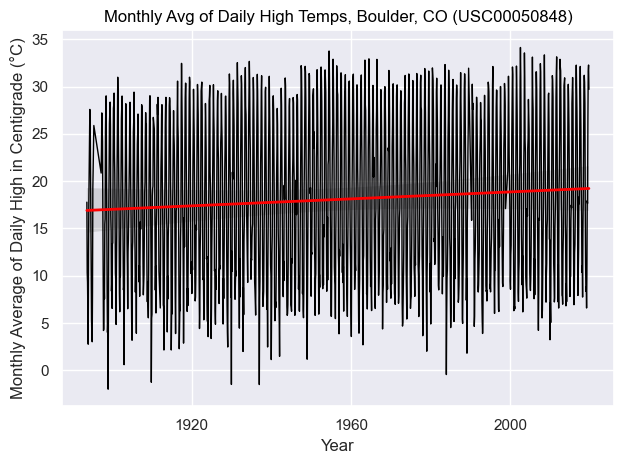

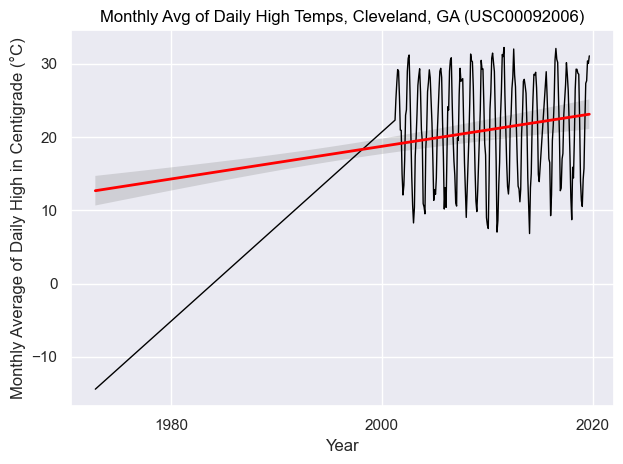

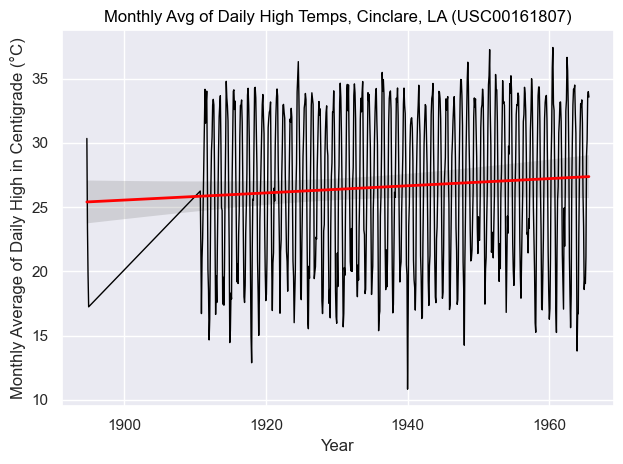

In [112]:
import pandas as pd
import numpy as np
import seaborn.objects as so
import seaborn_objects_recipes as sor
import matplotlib.dates as mdates

for station_id in earliest["id"].drop_duplicates():
    df = max_temp[max_temp["id"] == station_id].copy()
    df["mean_tmax"] = df["mean_tmax"].astype(float) / 10.0  # convert to °C
    df["date"] = pd.to_datetime(
        df["year"].astype(str) + "-" + df["month"].astype(str),
        format="%Y-%m",
        errors="coerce",
    )
    df = df.dropna(subset=["date", "mean_tmax"]).sort_values("date")

    station_name = earliest.loc[earliest["id"] == station_id, "station_name"].iloc[0]

    plot = (
        so.Plot(df, x="date", y="mean_tmax")
        .add(so.Line(color="black", alpha=1, linewidth=1))  # data line
        .add(
            so.Line(color="red", linewidth=2),
            PolyFitWithCI := sor.PolyFitWithCI(order=1, gridsize=200, alpha=0.1),
        )
        .add(so.Band(color="gray", alpha=0.25), PolyFitWithCI)
        .label(
            x="Year",
            y="Monthly Average of Daily High in Centigrade (°C)",
            title=f"Monthly Avg of Daily High Temps, {station_name} ({station_id})",
        )
    )
    plot.show()

## Want More Practice?

If you *really* want a challenge, the file `ghcnd_daily_30gb.tar.gz` will decompress into `ghcnd_daily.dat`, the full version of the GHCND daily data. It contains not only daily high temps, but also daily low temps, preciptionation, etc. Moreover, it is still in fixed-width format, and is about 30gb in raw form. 

Importing and chunking this data (with moderate optimizations) took about 2 hours on my computer. 

If you're up for it, it's a great dataset to wrestling with data in weird formats and chunking. 

**Pro-tip:** strings take up *way* more space in RAM than numbers, so some columns can be converted to keep the memory footprint of the data down. 